# Problem Statement :-
## Predicting the selling price of cars from car dekho.com

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_car_data = pd.read_csv('car data.csv')

In [3]:
df_car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Here 'Selling_Price' is our dependant variable since we need to figure it out
## All other columns are independant

In [4]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# We see that column 'Name' would have no significance in our project since the price depends on the features and not the name
# So we can safely drop the column

In [5]:
df_car_data.drop(['Car_Name'],axis=1,inplace=True)

In [6]:
df_car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# We see that a new column can be derived - 'age_of_car' from the Year column by substracting it from current year
# Since 'age_of_car' can play an important role in the price prediction instead of the Year column

In [7]:
# Creating a new column Current Year which shows the current year
df_car_data['Current_Year']=2022

In [8]:
df_car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022


In [9]:
df_car_data['Age_of_Car']=df_car_data['Current_Year']-df_car_data['Year']
df_car_data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_Car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022,6
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022,7
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022,13
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022,5


## Now we have derived the Age_of_Car.... so the columns 'Year' and 'Current Year' are of no use 

In [10]:
# So we  drop the two columns
df_car_data.drop(['Year','Current_Year'],inplace=True,axis=1)
df_car_data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


# We try to handle the categorical features

In [11]:
# We take a look at the categorical variables
# We try to find out the different unique values in the categorical columns
print(df_car_data['Fuel_Type'].unique())
print(df_car_data['Seller_Type'].unique())
print(df_car_data['Transmission'].unique())
print(df_car_data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


## Therefore these are the different categories present in the given categorical columns

## We want to reduce this categorical columns into numerical columns to fit inside our model

## DUMMY variables can be used to convert categorical data into numerical data by creating new numerical columns corresponding to the already existing categorical columns

# We are using 'One Hot Encoding' Technique which assigns 0/1 (True/False) to the different categorical variables in our column and assigning new columns to these categorical variables
# We are using drop_first to drop the first column in order to prevent the dummy variable trap

In [12]:
final_dataset = pd.get_dummies(df_car_data,drop_first=True)  
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


# Note
## Using the get_dummies we get rid of tyhe categorical variables :-
## Using drop_first drops we achieve the following--
## 1. Fuel_Type-- CNG column is dropped (alphabetically first category is dropped)
## 2. Seller_Type-- Dealer column dropped
## 3. Transmission-- Automatic column dropped

## Plotting a pairplot for the df_car_data dataset
## Pairplot actually shows the scatterplot between the numerical columns in our dataset

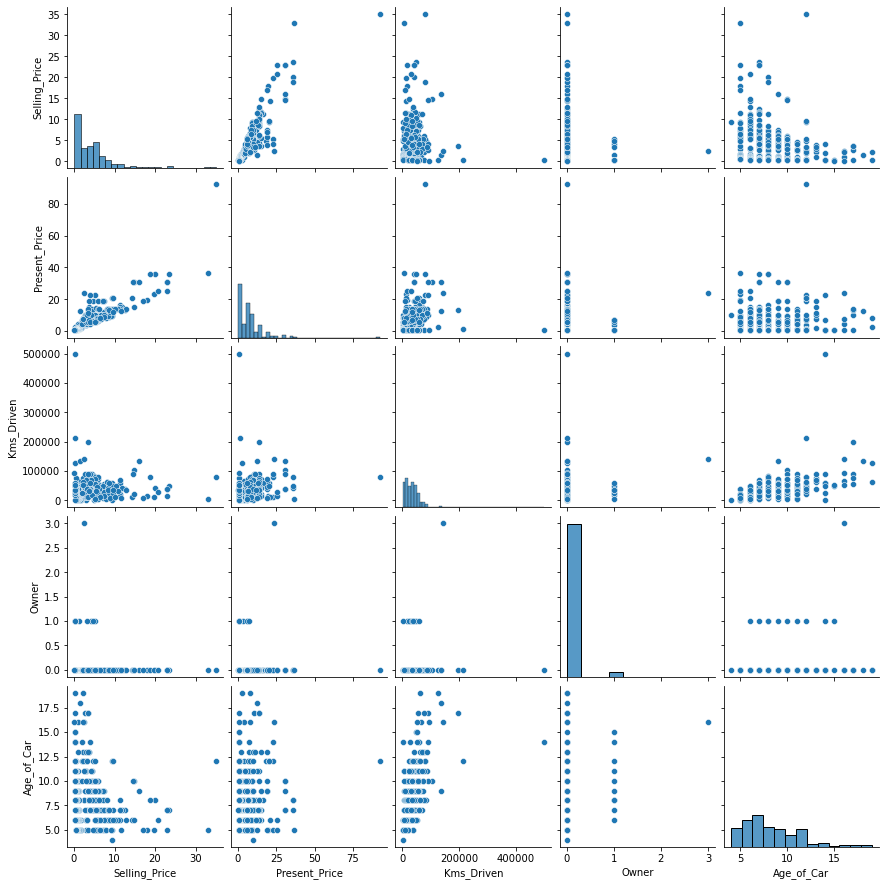

In [13]:
sns.pairplot(df_car_data)

## Plotting a pairplot for the final_dataset 

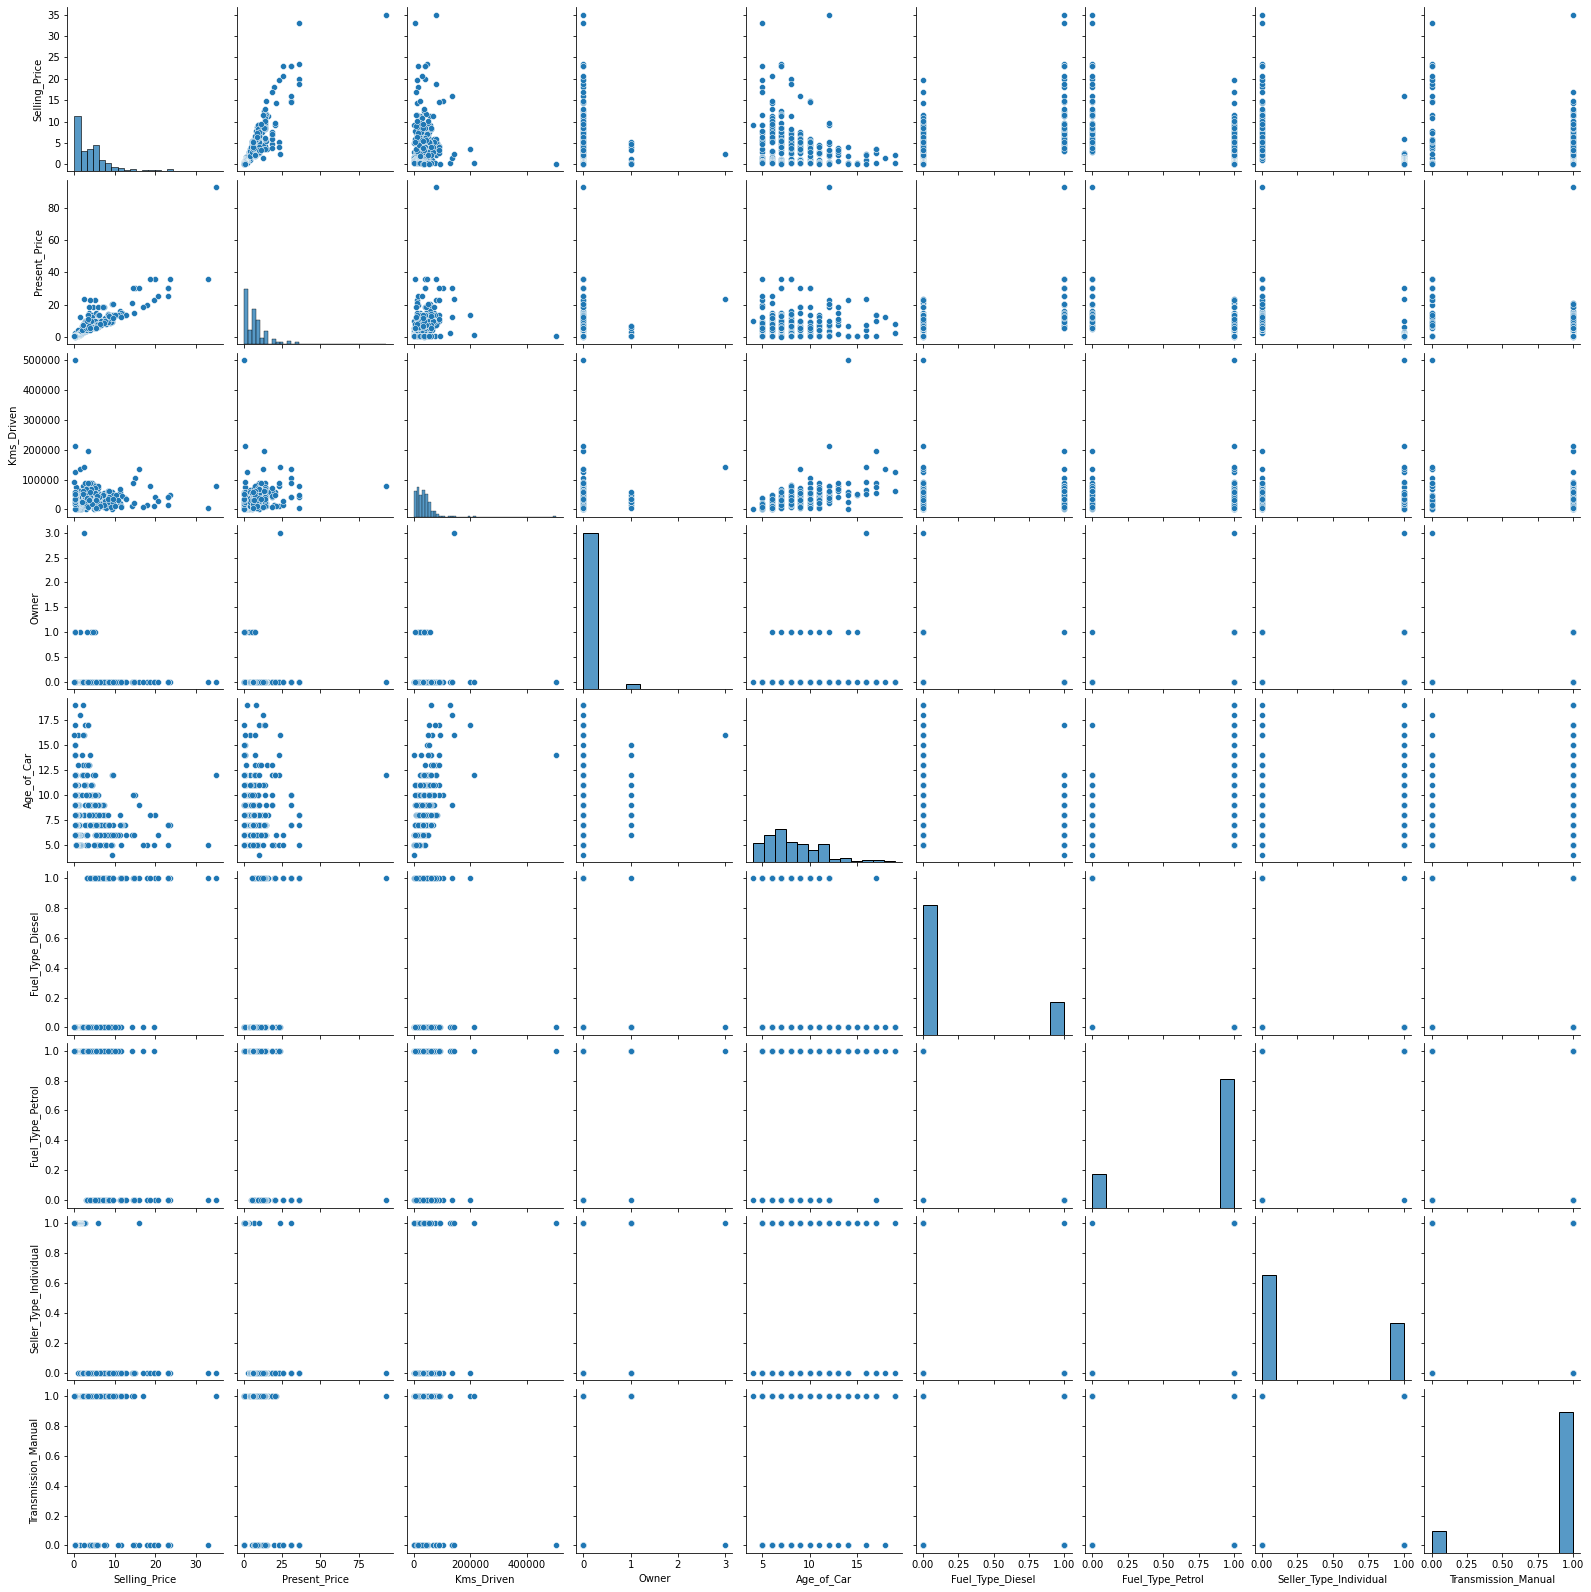

In [14]:
sns.pairplot(final_dataset)

In [15]:
# final_dataset.corr()  gives the Pearson Correlation Coefficient between the columns in the final_dataset
# We assign this correlation matrix in our final_dataset_corrmat variable
final_dataset_corrmat = final_dataset.corr()
final_dataset_corrmat

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_Car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [16]:
# We do the same with our df_car_data by finding the correlation matrix and assigning it to a variable car_data_corrmat
#get correlations of each features in df_car_data dataset
car_data_corrmat = df_car_data.corr()  # Since we apply .corr() method in our df_car_data the categorical columns are skipped
car_data_corrmat  # Corrmat is our correlation matrix

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_Car
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age_of_Car,-0.236141,0.047584,0.524342,0.182104,1.000000


In [17]:
top_corr_features = corrmat.index  # Grabbing the index of the correlation matrix 
top_corr_features   # Displaying indices in the form of a numpy array

NameError: name 'corrmat' is not defined

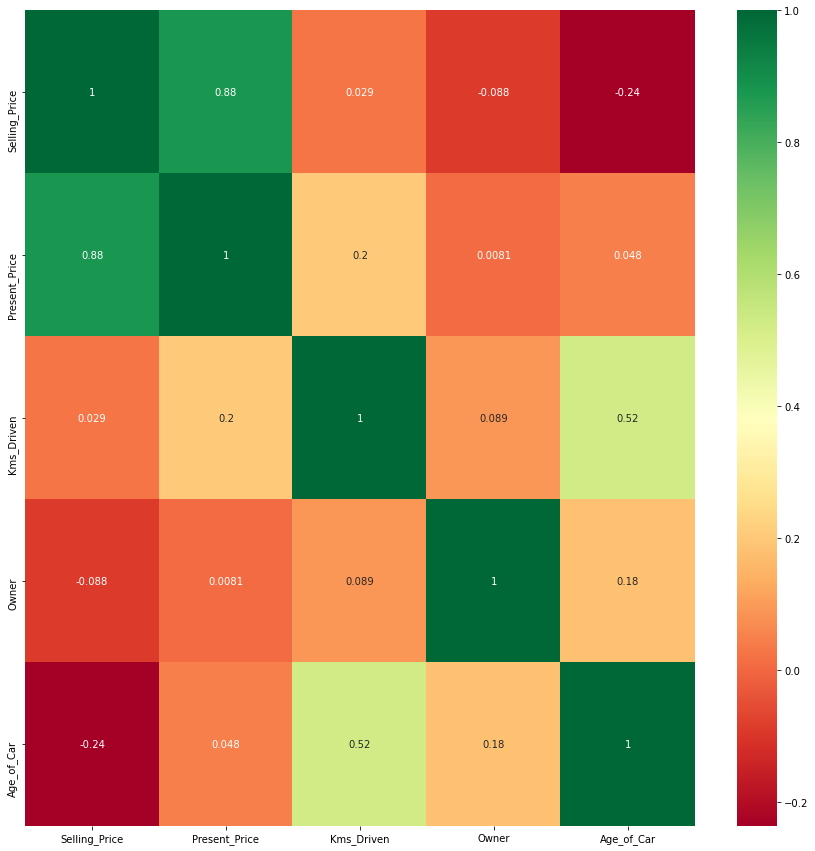

In [18]:
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(car_data_corrmat,annot=True,cmap="RdYlGn")

<AxesSubplot:>

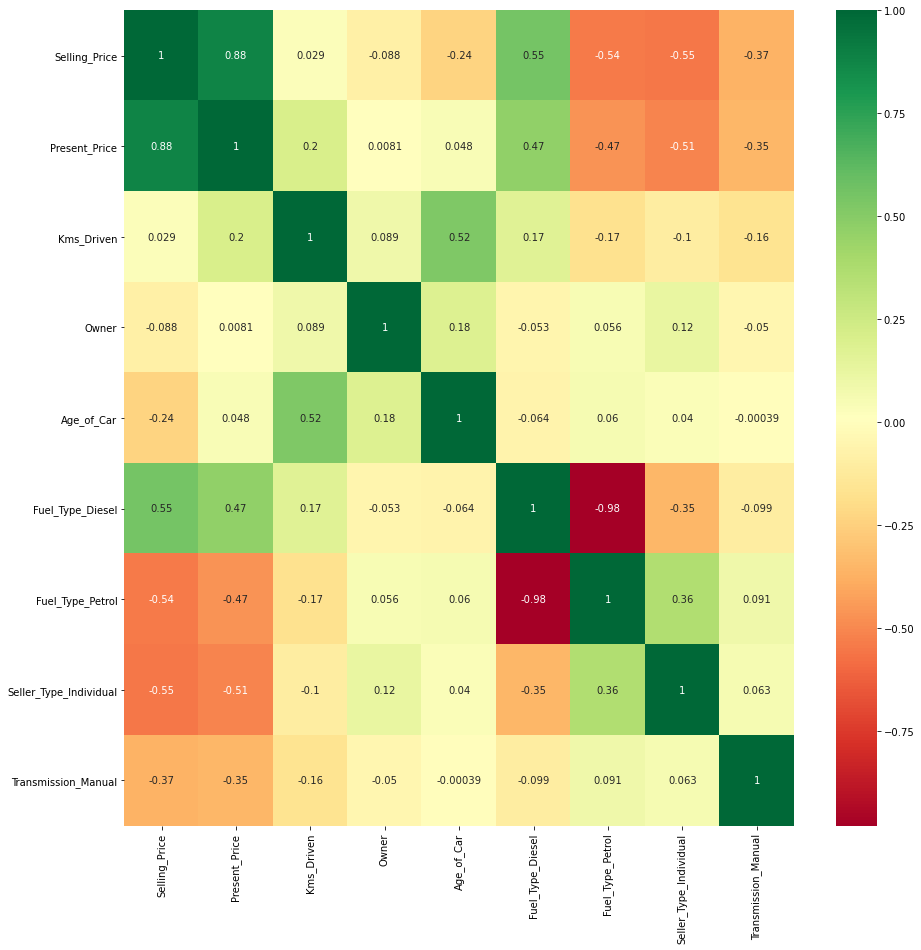

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(final_dataset_corrmat,annot=True,cmap="RdYlGn")

In [20]:
# Separating the independant variables
X=final_dataset.iloc[:,1:]  # Skipping the 'Selling Price' column which is our dependant feature
y=final_dataset.iloc[:,0]   # Only fetching the 'Selling Price' column in Y

In [21]:
X

,Present_Price,Kms_Driven,Owner,Age_of_Car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,6,1,0,0,1
297,5.90,60000,0,7,0,1,0,1
298,11.00,87934,0,13,0,1,0,1
299,12.50,9000,0,5,1,0,0,1


# Finding the order of important features 

In [22]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor 
# The ordering of the important features are done by this external/extra trees regressor , since this is a regressor problem
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)  # .feature_importances_ is the inbuild function

# Here the output array is the value of importances of the different features and they are indexed according to the column index
# in the X table-- index 0 is the Present_Price which has highest importance , followed by index 4 which is Fuel Type Diesel
# having the second highest feature importance

[0.35705994 0.04349821 0.00131427 0.07694948 0.22808927 0.01356859
 0.13970675 0.13981349]


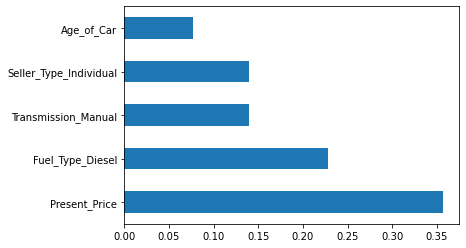

In [24]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns) # Converting the feature importance values into a series
feat_importances.nlargest(5).plot(kind='barh') # nlargest(5) argument here means  top 5 values
plt.show()

## Now doing a train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape

(210, 8)

In [27]:
y_train.shape

(210,)

In [28]:
# Now implementing a random forest regressor
# Note: We don't have to scale values when we are performing a random forest regressor.
# We know Random Forest Regressor uses decision trees so we dont have to do scaling
from sklearn.ensemble import RandomForestRegressor

In [29]:
regressor=RandomForestRegressor() # There are different parameters in Random Forest Regressor so we need to do Hyperparameter-
# tuning

In [30]:
## Hyperparameter Tuning
# here we are selecting different decision trees...estimators are decision trees
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized search cv helps us to find the best parameters 

In [32]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [35]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [38]:
rf_random.best_score_

-3.9441426891106084

In [39]:
predictions=rf_random.predict(X_test)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

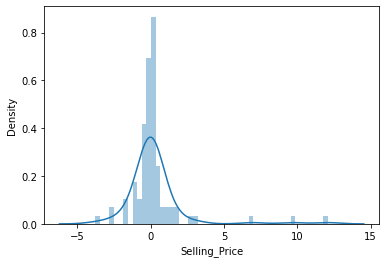

In [40]:
sns.distplot(y_test-predictions)

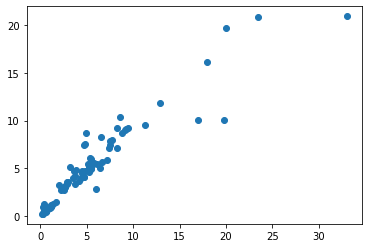

In [41]:
plt.scatter(y_test,predictions)

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8895997802197804
MSE: 4.061436030078634
RMSE: 2.01530048133737


In [44]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)